## Cost Function - 
##### A Cost Function is used to measure just how wrong the model is in finding a relation between the input and output.
##### It tells us how badly our model is behaving/predicting.

## Cost Function for Linear Regression
##### A Linear Regression model uses a straight line to fit the model. This is done using the equation for a straight line.

$Y = mX + b$

##### where Y is the dependent variable,  
##### X is the independent variable, 
##### m is the slope of the line and 
##### b is the y-intercept, the point where the line crosses the y-axis when x is 0.


##### For our Linear Regression model, the cost function will be the minimum of the Root Mean Squared Error of our model, obtained by subtracting the predicted values from actual values. Our cost function will be the minimum of these error values.

$Cost Function (J) = \frac{1}{n}\sum_{i=1}^n(y - (mx + b))^2$

## Gradient Descent
##### Gradient Descent is an algorithm which is used to optimize the cost function or the error of our model. It is used to find the minimum value of error possible in our model.
##### Gradient Descent can be visualized as a ball rolling down a hill. In this case, the ball will roll to the lowest point in the hill. This point can be taken as the point where error is least.

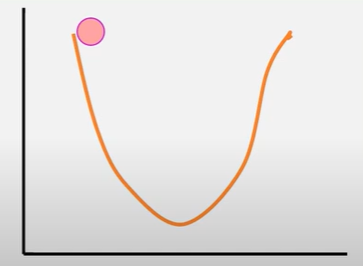 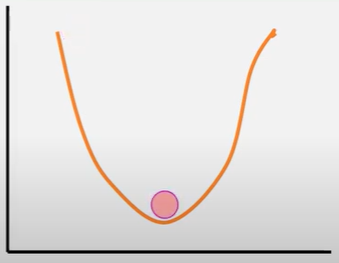

##### In Gradient Descent, we find the error in our model for different values of input variables. This is repeated and soon see that the error values keep getting smaller and smaller. Soon we'll arrive at the values for variables when the error is the least and cost function is optimized.
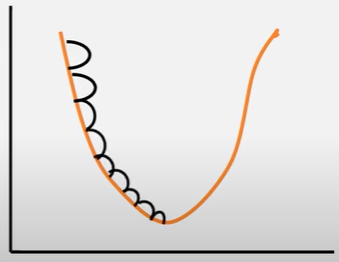

##### The small difference between errors can be obtained by differentiating the cost function and subtracting if from previous gradient descent to move down the slope.

In [1]:
import numpy as np
import math

In [2]:
# Gradient 

In [55]:
def gradient_descent_(X, y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(X)
    learning_rate = 0.08
    cost_old = float('inf')  # Initialize cost_old to a large value
    epsilon = 1e-20  # Small value for early stopping
    X = np.array(X)
    y = np.array(y)
    # Plotting the original data points
    # plt.scatter(X, y, color='blue', marker='o', label='Data Points')
    for i in range(iterations):
        y_predicted = np.dot(X, m_curr) + b_curr
        cost_new = np.mean((y - y_predicted)**2)
        md = -2 * np.mean(X * (y - y_predicted)) #derivative of m
        bd = -2 * np.mean(y - y_predicted) #derivative of b

        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if np.abs(cost_old - cost_new) < epsilon:
            break
        cost_old = cost_new
         # Plotting the fitted line
        x_range = np.linspace(min(X), max(X), 100)
        y_range = m_curr * x_range + b_curr
        # plt.plot(x_range, y_range, color='red')
    print("m: {}, b: {}, cost: {}, iteration: {}".format(m_curr, b_curr, cost_new, i+1))
    # plt.xlabel('X')
    # plt.ylabel('y')
    # plt.title('Linear Regression with Gradient Descent')
    # plt.legend()
    # plt.show()

In [60]:
# Example usage:
X = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
gradient_descent_(X, y)

m: 2.0000000002599894, b: 2.9999999990613553, cost: 1.694077086867124e-19, iteration: 788


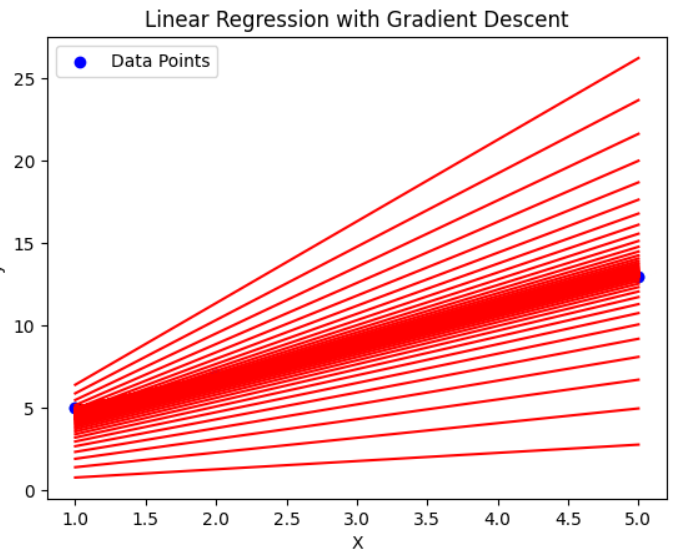

In [56]:
X_1 = 2*np.random.rand(1000)

In [57]:
m = 3
b = 6

In [58]:
y_1 = np.random.rand(1000) + m * X_1 + 90

In [59]:
gradient_descent_(X_1, y_1)

m: 3.0105210268918325, b: 90.49266111623105, cost: 0.08324173191725319, iteration: 844
